In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data1 = pd.read_csv("least_square/Data1.csv")
data1=data1.rename(columns={"NILAI KONTRAKTUAL (DALAM MILYAR)" : "NILAI"})
data2 = pd.read_csv("least_square/Data2.csv")
data2= data2.rename(columns={"NILAI KONTRAKTUAL (DALAM MILYAR)" : "NILAI"})

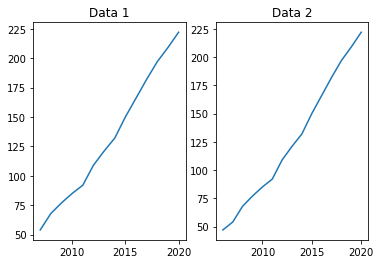

In [3]:
plt.subplot(121)
x = data1["TAHUN"]
y = data1["NILAI"]
plt.plot(x,y)
plt.title("Data 1")

plt.subplot(122)
x = data2["TAHUN"]
y = data2["NILAI"]
plt.title("Data 2")

plt.plot(x,y)


In [4]:
#menambahkan data x xy dan x^2
def linListSquare(data,name) :
    l = int(len(data['NILAI']))
    if(l % 2 != 0) :
        rlst = [0]
        llst =[]
        for i in range(1,int(l/2)+1):
            rlst.append(i)
            llst.append(-1 * i)
        llst.reverse()
        llst = llst + rlst       
    else :
        rlst = [1]
        llst = [-1]
        st = 3
        for i in range(1,int(l/2)) : 
            rlst.append(st)
            llst.append(-1*st)
            st+=2
        llst.reverse()
        llst = llst + rlst
    
    a = data['NILAI'].sum()/l
    i = 0 
    xy = []
    xsqr = []

    for x in llst :
        xy.append(x*data['NILAI'][i])
        xsqr.append(x**2)
        i+=1
    
    data['x'],data['xy'],data['X^2']= llst,xy,xsqr
    b=data['xy'].sum()/data['X^2'].sum()
    print("Untuk {}  : \nY\' ={} + {}X ".format(name,a,b))
    return data,a,b

#fungsi forecasting dengan linear least square
def forecasting(data,forecast,a,b) :
    l = int(len(data))
    i=1
    if(l%2==0) : 
        if(forecast < data['TAHUN'][0]) : 
            i = -1
        idx = data[data['x'] == i ].index.values
        xVal =  1 + (forecast - data['TAHUN'][idx].item()) * 2 if i>0 else -1 + (data['TAHUN'][idx].item()-forecast) * (-2)
        Y = a + b*xVal
        print(xVal)
        return Y
    else :
        i = 0
        idx = data[data['x'] == i ].index.values
        xVal =  forecast - data['TAHUN'][idx].item()
        Y = a + b*xVal 
        return Y




In [5]:
data1,a1,b1=linListSquare(data1,"data1")
pd.set_option('display.max_rows', data1.shape[0]+1)
print("\n")
print(data1)


Untuk data1  : 
Y' =133.14285714285714 + 6.591208791208791X 


    TAHUN  NILAI   x    xy  X^2
0    2007     54 -13  -702  169
1    2008     68 -11  -748  121
2    2009     77  -9  -693   81
3    2010     85  -7  -595   49
4    2011     92  -5  -460   25
5    2012    109  -3  -327    9
6    2013    121  -1  -121    1
7    2014    132   1   132    1
8    2015    150   3   450    9
9    2016    166   5   830   25
10   2017    182   7  1274   49
11   2018    197   9  1773   81
12   2019    209  11  2299  121
13   2020    222  13  2886  169


In [6]:
data2,a2,b2=linListSquare(data2,"data2")
pd.set_option('display.max_rows', data2.shape[0]+1)
print("\n")
print(data2)

Untuk data2  : 
Y' =127.4 + 12.864285714285714X 


    TAHUN  NILAI  x    xy  X^2
0    2006     47 -7  -329   49
1    2007     54 -6  -324   36
2    2008     68 -5  -340   25
3    2009     77 -4  -308   16
4    2010     85 -3  -255    9
5    2011     92 -2  -184    4
6    2012    109 -1  -109    1
7    2013    121  0     0    0
8    2014    132  1   132    1
9    2015    150  2   300    4
10   2016    166  3   498    9
11   2017    182  4   728   16
12   2018    197  5   985   25
13   2019    209  6  1254   36
14   2020    222  7  1554   49


In [7]:
print("Forcasting \n")
y1 = forecasting(data1,2021,a1,b1)
y2 = forecasting(data2,2021,a2,b2)

print("Perkiraan nilai kontraktual pada tahun 2021 dengan data 1 : {} Milyar".format(y1))
print("Perkiraan nilai kontraktual pada tahun 2021 dengan data 2 :{} Milyar".format(y2))
print("Selisih nilai kontraktual data1 dan data2 = {}".format(abs(y2-y1)))



Forcasting 

15
Perkiraan nilai kontraktual pada tahun 2021 dengan data 1 : 232.01098901098902 Milyar
Perkiraan nilai kontraktual pada tahun 2021 dengan data 2 :230.31428571428572 Milyar
Selisih nilai kontraktual data1 dan data2 = 1.6967032967033049
